In [19]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [6]:
img_path = pathlib.Path("../resources/cologne.jpg")

In [21]:
img_file = np.array(Image.open(img_path))
img_file = np.mean(img_file, axis=2)

# Reconstrução das principais características

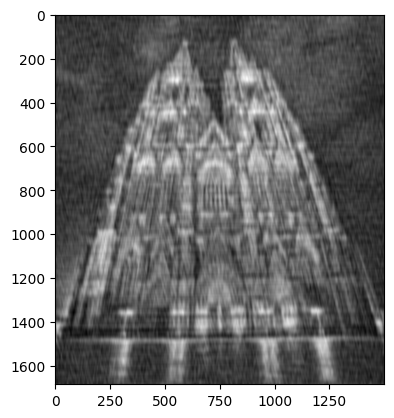

In [22]:
Bt = np.fft.fft2(img_file)
Btsort = np.sort(np.abs(Bt.reshape(-1)))

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh # Find small indices
    Atlow = Bt * ind # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real # Compressed image
    plt.imshow(Alow,cmap="gray")

# De-noising

In [48]:
Bnoise = img_file + 50 * np.random.randn(*img_file.shape).astype("uint8")
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift) + 1) # Put FFT on log scale

nx, ny = img_file.shape
X, Y = np.meshgrid(np.arange(-ny/2 + 1, ny/2 + 1),np.arange(-nx/2 + 1, nx/2 + 1))
R2 = np.power(X, 2) + np.power(Y, 2)
ind = R2 < 150**2
Btshiftfilt = Btshift * ind
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale
Btfilt = np.fft.ifftshift(Btshiftfilt)
Bfilt = np.fft.ifft2(Btfilt)

/tmp/ipykernel_25546/459446239.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Bfilt_real = Bfilt_real.astype(np.float64)


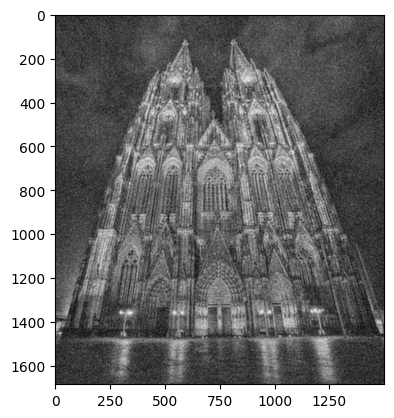

In [49]:
Bfilt_real = Bfilt.copy()
Bfilt_real.imag = 0
Bfilt_real = Bfilt_real.astype(np.float64)
plt.imshow(Bfilt_real, cmap="gray")